### ImageJ

#### For getting the image analysis
- Open sample-blob
- image-adjust-autothrehold-otsu--(uncheck white object)
- then, Edit-invert

- analyze
   - set measurements (set the shape descriptors you want)

- analyze
   - analyze particle
   - count without changing the size
   - change size: 50 to infinity
   - if circularity change 0.9 to 1.0 (it will only give extremely rounded ones only, skip the enlongated ones)
   
- click on the reesult--file-save-as CSV

#### For getting the the distance map
- Open sample-blob
- process-binary-make binary

- process-binary-distance map
- analyze-- 3D surface plot -- (Tick-spectral LUT)--(the last scroll bar is the water level)


#### For getting the image watershed
###### The watershed uses the distance map for working
- Open sample-blob
- process-binary-make binary
- process-binary-watershed (elongated one will division/separations)


- analyze
   - set measurements (set the shape descriptors you want)

- analyze
   - analyze particle
   - count without changing the size
   - change size: 50 to infinity
   - if circularity change 0.9 to 1.0 (it will only give extremely rounded ones only, skip the enlongated ones)
   

 

# New code from lecture

In [1]:
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import numpy as np
from skimage.feature import peak_local_max 
from skimage.segmentation import watershed 
from skimage.filters import threshold_otsu 
from sklearn.decomposition import PCA
from skimage import io # for image opening and saving

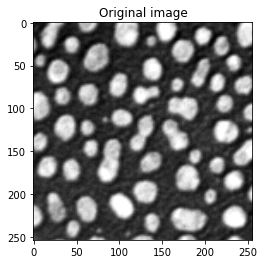

In [2]:
filename = 'blobs.tif'
blob = io.imread(filename) 
plt.imshow(blob,'gray')
plt.title(label = "Original image", fontsize=12)
plt.show()

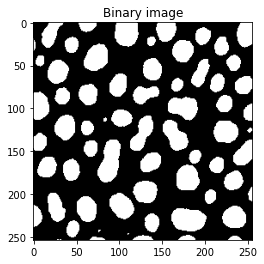

In [3]:
#Otsu threshold
threshold_global_otsu = threshold_otsu(blob) 
blob2 = blob >= threshold_global_otsu
plt.figure()
plt.imshow(blob2, cmap='gray')
plt.title(label = "Binary image", fontsize=12)
plt.show()

# Watershed segmentation

- Watershed segmentation Code Skimage:
http://scipy-lectures.org/advanced/image_processing/auto_examples/plot_watershed_segmentation.html#sphx-glr-download-advanced-image-processing-auto-examples-plot-watershed-segmentation-py

Details: https://people.cmm.minesparis.psl.eu/users/beucher/wtshed.html

- Watershed on gray images:
     - http://bigwww.epfl.ch/sage/soft/watershed/

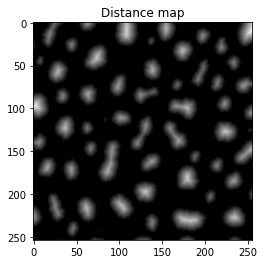

In [4]:
#watershed

#Distance map
distance = ndi.distance_transform_edt(blob2) 
plt.imshow(distance, 'gray')
plt.title(label = "Distance map", fontsize=12)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14868\586278583.py:2: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3,3)), labels=blob2)


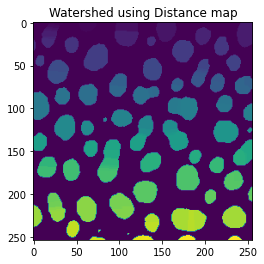

In [5]:
#watershed using distance map
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3,3)), labels=blob2)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance,markers, mask=blob2)
plt.figure() 
plt.title(label = "Watershed using Distance map", fontsize=12)
plt.imshow(labels)
plt.show()

NOTE: in some of the enlongated objects, you will notice 2 different colors. whether the others have only 1 color. So, the 2 colored obejxt are actually 2 objects, infused together. which watershed successfully finds out.


#### Skimage measurements, region-groups
https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops

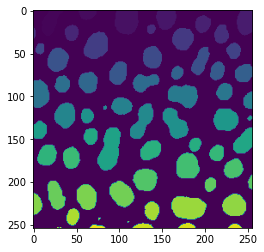

In [6]:
#measure objects
from skimage import measure 
labels2 = measure.label(blob2)
plt.figure() 
plt.imshow(labels2)
plt.show()

In [7]:
properties = measure.regionprops(labels2)
for prop in properties:
    print(prop.perimeter, prop.area, prop.centroid)

91.6335136523794 447 (13.297539149888143, 20.017897091722595)
54.970562748477136 193 (4.419689119170984, 62.89637305699482)
98.2842712474619 683 (12.734992679355784, 108.37335285505124)
79.4558441227157 448 (9.8125, 154.41964285714286)
84.62741699796952 483 (13.63768115942029, 246.74120082815736)
61.69848480983499 290 (15.831034482758621, 197.2551724137931)
56.04163056034261 241 (26.13278008298755, 44.56846473029046)
32.72792206135785 89 (21.831460674157302, 137.20224719101122)
62.87005768508881 290 (27.813793103448276, 218.94827586206895)
24.621320343559642 35 (26.285714285714285, 0.8)
82.18376618407356 513 (33.175438596491226, 173.99025341130604)
97.25483399593904 681 (41.23935389133627, 73.31424375917769)
55.698484809834994 242 (47.103305785123965, 233.23140495867767)
36.14213562373095 105 (44.666666666666664, 7.8)
78.76955262170047 465 (54.78709677419355, 138.46666666666667)
87.25483399593904 423 (59.28841607565012, 194.6501182033097)
84.42640687119284 533 (57.51969981238274, 28.47

# Watershed segmentation

- Watershed segmentation Code Skimage:
http://scipy-lectures.org/advanced/image_processing/auto_examples/plot_watershed_segmentation.html#sphx-glr-download-advanced-image-processing-auto-examples-plot-watershed-segmentation-py

Details: https://people.cmm.minesparis.psl.eu/users/beucher/wtshed.html

- Watershed on gray images:
     - http://bigwww.epfl.ch/sage/soft/watershed/

In [12]:
import numpy as np
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
from scipy import ndimage

In [13]:
# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
image = np.logical_or(mask_circle1, mask_circle2)


# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
distance = ndimage.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=image)
markers = ndimage.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14868\1361140786.py:14: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=image)


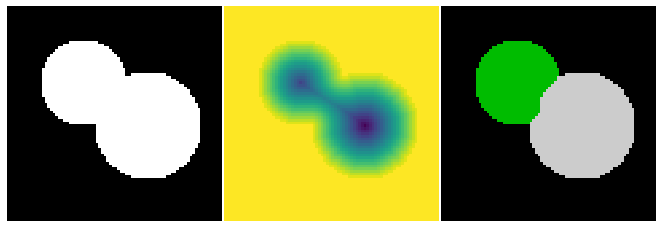

In [14]:
##plotting the images
plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(-distance, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(labels, cmap='nipy_spectral', interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,right=1)
plt.show()

# Masking


In [15]:
from skimage.morphology import skeletonize, dilation, opening, square, disk
from skimage.morphology import remove_small_holes, remove_small_objects # for filling the holes and denoising
import matplotlib.pyplot as plt

import numpy as np
import math
from skimage import io


from skimage.filters import threshold_mean#for binarising
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu, threshold_minimum, threshold_triangle, threshold_mean


# For watershed
from scipy import ndimage as ndi#for distance
from skimage.feature import peak_local_max 
from skimage.segmentation import watershed 
from skimage import measure #measure objects


In [16]:
def get_image(name):
    """ Using the skimage.io import the image with the file name.
    This function returns the gray image as numpy array """
    
    #Getting the image  
    #filename = '../Images/'+name
    filename = name
    image_gray = io.imread(filename, as_gray = True) 
    image_RGB = io.imread(filename, as_gray = False) 
    
    return image_gray, image_RGB

In [17]:
def show_image(image, label ="Image:", size=(6,2), cmap='viridis'):
    """This function shows/plots the given image."""
    plt.subplots(1,1,figsize=size)
    plt.title(label = label, fontsize=12)
    plt.imshow(image, cmap=cmap) 
    plt.show()

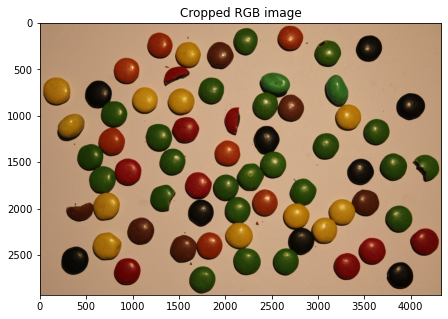

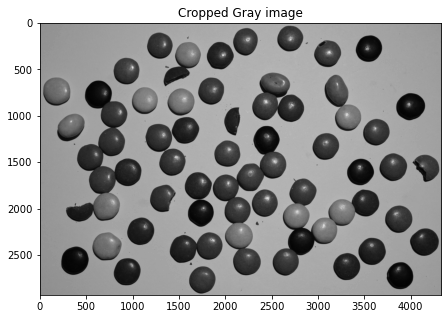

In [18]:
image_gray, image_RGB = get_image("IMG_2754_nonstop_alltogether.JPG")
# show_image(image, "Original Binary image")

#cropping the head
image_gray = image_gray[420:3350, 650:4980]   #[Row, COL]
image_RGB = image_RGB[420:3350, 650:4980]   #[Row, COL]

show_image(image_RGB, label ="Cropped RGB image", size=(10,5))
show_image(image_gray, label ="Cropped Gray image", size=(10,5), cmap='gray')

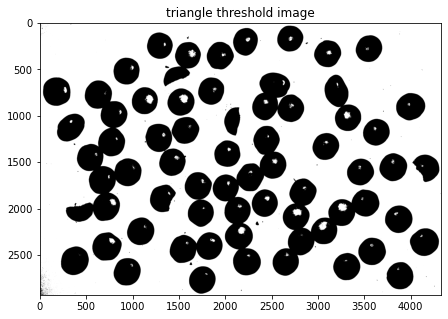

In [19]:
#binarising using triangle filter
thresh = threshold_triangle(image_gray)
binary_triangle = image_gray > thresh
show_image(binary_triangle, "triangle threshold image", (12,5), cmap='gray')

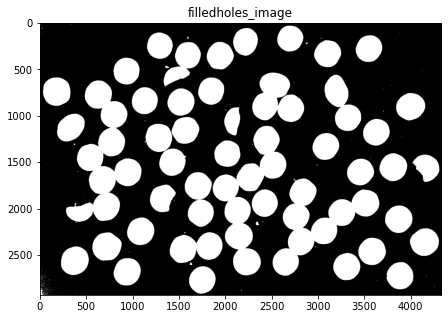

In [20]:
# fill holes
inverted_binary_triangle = np.invert(binary_triangle)
holes_filled = remove_small_holes(inverted_binary_triangle, area_threshold = 8000)
show_image(holes_filled, "filledholes_image", (12,5), cmap='gray')

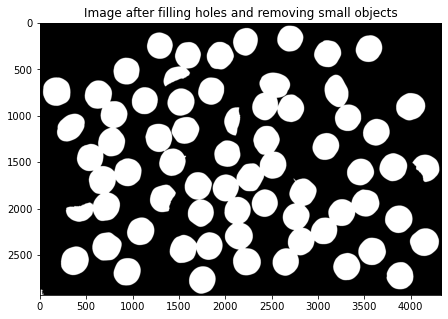

In [21]:
#removing noise
filled_denoised_image = remove_small_objects(holes_filled, 1000)
show_image(filled_denoised_image, "Image after filling holes and removing small objects", (12,5), cmap='gray')

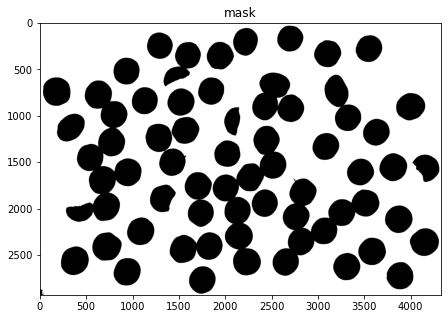

In [22]:
# Creating mask
mask = np.invert(filled_denoised_image)
show_image(mask, "mask", (12,5), 'gray')

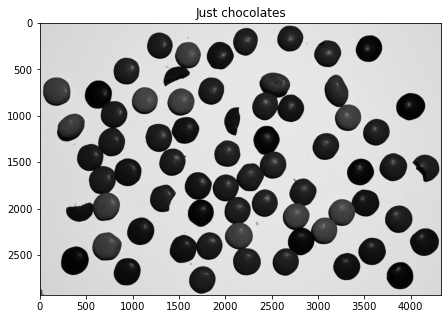

In [23]:
# Just the chocolates
just_chocolates =  mask + image_gray 
show_image(just_chocolates, "Just chocolates", (12,5), 'gray')

# Masking in Image J
- image- type- 8 bit - adjust- triangle- autothreshold- 
- edit-invert [Fill holes ONLY WORKS WHEN THE OBJECT IS WHITE]
- process-binary-fill holes 
- edit-invert [For masking objects needs to be black/0]
- Process- image- calculator - Original Color image(image1) OR Mask (image2) 